In [1]:
import os
import numpy as np 
import pandas as pd 
from datetime import datetime
import time
import random
from tqdm.auto import tqdm


#Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler
import torchvision.transforms as T

#sklearn
from sklearn.model_selection import StratifiedKFold
from skimage import io

################# DETR FUCNTIONS FOR LOSS######################## 
import sys
sys.path.append('./detr_custom/')

from models.matcher import HungarianMatcher
from models.detr import SetCriterion
#################################################################

import matplotlib.pyplot as plt

#Glob
from glob import glob

from typing import Iterable, Sequence, List, Tuple, Dict, Optional
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
from generators import BlenderStandardDataset

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

In [14]:
TORCH_CACHE_DIR = 'torch_cache'
DATASET_DIR = '/mnt/blendervol/objdet_std_data'
SQL_TABLE = 'bboxes_std'
BATCH_SIZE = 2

In [15]:
datagen = BlenderStandardDataset(DATASET_DIR, SQL_TABLE, BATCH_SIZE, shuffle=False)
X, y = datagen[0]

In [16]:
denominator = 0
mean = np.zeros(3)
for i, (imgbatch, __) in enumerate(tqdm(datagen, total=len(datagen))):
    try:
        imgbatch = np.array(imgbatch)
        n = len(imgbatch)
        mean = np.average((mean, imgbatch.mean((0,1,2))), 0, weights=(denominator, n))
        denominator += n
    except Exception as e:
        print(e)
        print(i)
        print(imgbatch.shape)
        break

axis 1 is out of bounds for array of dimension 1
1500
(0,)



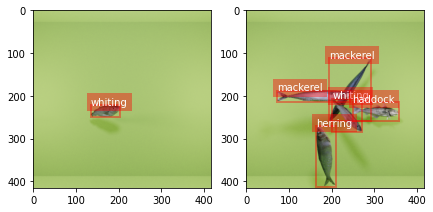

In [17]:
datagen.plot_batch(2)

In [244]:
# Super memory efficient implementation :^)
mean = np.zeros(3)
denominator = 0
for thing in [A, B, C]:
    mean = np.average((mean, thing.mean((0,1,2))), 0, weights=(denominator, len(thing)))
    denominator += len(thing)
    
print(mean)

[2. 4. 6.]


$$\frac{1+2+3}{3}$$

To update with another number, say $5$:

$$\frac{1+2+3}{3} \Rightarrow \frac{1+2+3+5}{3+1}$$

then add another two, say $8,9$:

$$\frac{1+2+3}{3} \Rightarrow \frac{1+2+3+5}{3+1} \Rightarrow \frac{1+2+3+4+5+8+9}{3+1+2}$$,

Generally, when we have already calculated an arithmethic mean $$\frac{S}{n},$$ we can update it given the seqence of numbers $\Omega$, by doing

$$\frac{S + \Omega}{n + |\Omega|}$$